In [1]:
import numpy as np # linear algebra
import pandas as pd 
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_2014 = pd.read_csv('../dataset/vehicle_stops_2014_datasd.csv')
data_2015 = pd.read_csv('../dataset/vehicle_stops_2015_datasd.csv')
data_2016 = pd.read_csv('../dataset/vehicle_stops_2016_datasd.csv')
data_2017 = pd.read_csv('../dataset/vehicle_stops_2017_datasd.csv')
data_combined = pd.read_csv('../dataset/final_combined_dataset_v2.csv')

In [17]:
def create_race_dictionary(csv_path):
    """
    Creates a race dictionary based on the specified CSV file.

    Parameters:
    - csv_path (str): The path to the CSV file containing race codes and descriptions.

    Returns:
    - race_dict (defaultdict): The race dictionary.
    """
    race_csv = pd.read_csv(csv_path)
    race_dict = collections.defaultdict(str)

    for i in range(len(race_csv)):
        race_dict[race_csv['Race Code'][i]] = race_csv['Description'][i]

    return race_dict

In [18]:
race_dictionary = create_race_dictionary('../dataset/vehicle_stops_race_codes.csv')

In [19]:
### Total unique violations
print("Total unique violations:-",len(data_combined['stop_cause'].unique()))

Total unique violations:- 23


### Stop Causes

In [20]:
data_combined['stop_cause'].value_counts()

Moving Violation                      302984
Equipment Violation                   122364
Radio Call/Citizen Contact              2900
Muni, County, H&S Code                  1970
Personal Knowledge/Informant            1585
Suspect Info (I.S., Bulletin, Log)      1161
No Cause Specified on a Card             528
Personal Observ/Knowledge                246
UNI, &County, H&&S Code                   80
&Moving Violation                         68
Suspect Info                              49
MUNI, County, H&S Code                    44
Other                                     32
&Equipment Violation                      10
not marked                                 5
none listed                                5
NOT SPECIFIED                              2
not marked  not marked                     2
NOT MARKED                                 2
&Radio Call/Citizen Contact                2
not noted                                  2
not listed                                 1
no cause l

### Stop by Race

In [21]:
race_list = list(data_combined['subject_race'].value_counts())

In [22]:
data_combined[data_combined['subject_race'] == 'U']['subject_age']

1819      33
1820      33
7121      65
20038     16
37289     27
          ..
409509    21
409907    32
429379    28
429755    80
436589    52
Name: subject_age, Length: 79, dtype: int32

In [23]:
def filter_age_range(data, age_range=(1, 120)):
    """
    Filters a DataFrame based on a specified age range.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - age_range (tuple, optional): The age range to keep. Default is (1, 120).

    Returns:
    - filtered_data (DataFrame): The filtered DataFrame.
    """
    age_filter = data['subject_age'].between(*age_range)
    filtered_data = data[age_filter]

    return filtered_data

In [24]:
filtered_data_combined = filter_age_range(data_combined)

In [25]:
data_combined['subject_age'] = data_combined['subject_age'].astype(int)

### Pullover probability vs age for every Race

In [26]:
def plot_race_kde(data, race_dict, race_limited=None, age_range=(15, 75)):
    """
    Plots Kernel Density Estimates (KDE) for age distribution based on specified races.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - race_dict (dict): The dictionary mapping race codes to descriptions.
    - race_limited (list, optional): List of race codes to include. Default is None.
    - age_range (tuple, optional): The age range to visualize. Default is (15, 75).

    Returns:
    - None
    """
    if race_limited is None:
        race_limited = data['subject_race'].unique()

    fig, ax = plt.subplots()
    ax.set_xlim(*age_range)

    for race in race_limited:
        s = data[data['subject_race'] == race]['subject_age']
        s.plot.kde(ax=ax, label=race_dict.get(race, race))

    ax.legend()
    plt.show()

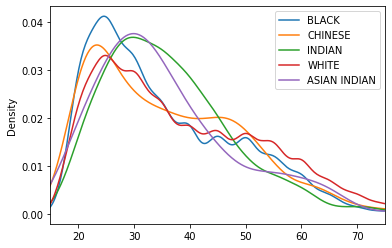

In [27]:
plot_race_kde(data_combined, race_dict, race_limited=['B', 'C', 'I', 'W', 'Z'], age_range=(15, 75))

### Pullover probability vs age for Asian Indians and Chinese

In [28]:
def plot_race_kde(data, race_dict, race_limited=None, age_range=(15, 75)):
    """
    Plots Kernel Density Estimates (KDE) for age distribution based on specified races.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - race_dict (dict): The dictionary mapping race codes to descriptions.
    - race_limited (list, optional): List of race codes to include. Default is None.
    - age_range (tuple, optional): The age range to visualize. Default is (15, 75).

    Returns:
    - None
    """
    if race_limited is None:
        race_limited = data['subject_race'].unique()

    fig, ax = plt.subplots()
    ax.set_xlim(*age_range)

    for race in race_limited:
        s = data[data['subject_race'] == race]['subject_age']
        s.plot.kde(ax=ax, label=race_dict.get(race, race))

    ax.legend()
    plt.show()

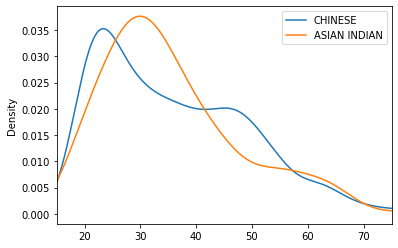

In [29]:
plot_race_kde(data_combined, race_dict, race_limited=['C', 'Z'], age_range=(15, 75))

### What does this graph tells us? 
#### Observe that the peak values for the two graphs are different. The chines peak comes around the age of 26/17 whereas the Indian Peak comes around the age of 32 33. We can infer that an Indian guy will have better probability of possessing a car in his 30's as compared to his 20's which makes sense, as more pullover per race at any age indicates more cars per race at any age  


### What is the significance of this information? 
### 

In [30]:
def plot_stop_cause_kde(data, stop_causes, age_range=(15, 75)):
    """
    Plots Kernel Density Estimates (KDE) for age distribution based on specified stop causes.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - stop_causes (list): List of stop causes to include.
    - age_range (tuple, optional): The age range to visualize. Default is (15, 75).

    Returns:
    - None
    """
    fig, ax = plt.subplots()
    ax.set_xlim(*age_range)

    for cause in data['stop_cause'].unique():
        if cause not in stop_causes:
            continue
        s = data[data['stop_cause'] == cause]['subject_age']
        s.plot.kde(ax=ax, label=cause)

    ax.legend()
    plt.show()

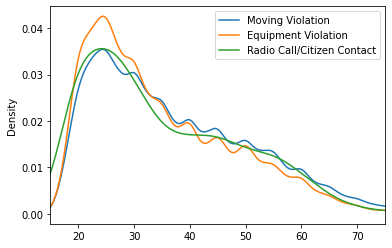

In [31]:
stop_reasons_to_plot = ['Moving Violation', 'Equipment Violation', 'Radio Call/Citizen Contact']
plot_stop_cause_kde(data_combined, stop_reasons_to_plot, age_range=(15, 75))